# Loan Approval Project - Utkarsh Gaikwad

### Step 1 : Import Training and Testing Datasets

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
training = pd.read_csv("D:/Etlhive class data/Project Loan 280822 Classification and Regression/Input/training_set.csv")
testing = pd.read_csv("D:/Etlhive class data/Project Loan 280822 Classification and Regression/Input/testing_set.csv")
training.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
training.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      504
CoapplicantIncome    286
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [3]:
training.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Dropping Statistically insignificant columns

In [4]:
training = training.drop(labels=['Loan_ID'],axis=1)

### Observed that Credit History has float64 object type need to convert to object

In [5]:
crd_hst = []
for i in range(len(training)):
    if training['Credit_History'][i]==1:
        crd_hst.append('Yes')
    elif training['Credit_History'][i]==0:
        crd_hst.append('No')
    else:
        crd_hst.append(None)
training['Credit_History']=crd_hst

In [6]:
crd_hst1 = []
for i in range(len(testing)):
    if testing['Credit_History'][i]==1:
        crd_hst1.append('Yes')
    elif testing['Credit_History'][i]==0:
        crd_hst1.append('No')
    else:
        crd_hst1.append(None)
testing['Credit_History']=crd_hst1

In [7]:
training.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
testing.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area         object
dtype: object

### Checking for Missing Values in Training and Testing Dataset

In [9]:
training.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
testing.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Missing Data Treatment

In [11]:
import import_ipynb
from PM3 import replacer
replacer(training)
replacer(testing)

importing Jupyter notebook from PM3.ipynb
Missing Values replaced in DataFrame
Missing Values replaced in DataFrame


In [12]:
training.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Exploratory Data Analysis

#### Checking Correlation in continuous columns

In [13]:
training.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116625,0.565552,-0.045147
CoapplicantIncome,-0.116625,1.000000,0.187884,-0.059710
LoanAmount,0.565552,0.187884,1.000000,0.038801
Loan_Amount_Term,-0.045147,-0.059710,0.038801,1.000000


#### Seperating Categorical and Continuous variables

In [14]:
from PM3 import catcon
cat, con = catcon(training)

Categorical and Continuous variables appended


#### Performing Anova of Loan Status with Continuous columns

In [15]:
from PM3 import ANOVA
q = []
for i in con:
    q.append(ANOVA(training,'Loan_Status',i))

In [16]:
pd.DataFrame({'Column':con,'pval':q})

,Column,pval
0,ApplicantIncome,0.90252
1,CoapplicantIncome,0.14239
2,LoanAmount,0.36769
3,Loan_Amount_Term,0.60396


#### Performing ChiSquare Test of Loan Status with Categorical columns

In [17]:
def chisquare(df,cat1,cat2):
    import pandas as pd
    from scipy.stats import chi2_contingency
    a,b,c,d = chi2_contingency(pd.crosstab(df[cat1],df[cat2]))
    return b

In [18]:
Q = []
for i in cat:
    Q.append(chisquare(training,'Loan_Status',i))

In [19]:
dc=pd.DataFrame({'Columns':cat,'Pval':Q})
dc

,Columns,Pval
0,Gender,7.391461e-01
1,Married,2.960858e-02
2,Dependents,3.688663e-01
3,Education,4.309962e-02
4,Self_Employed,1.000000e+00
5,Credit_History,3.418350e-40
6,Property_Area,2.136019e-03
7,Loan_Status,1.544676e-134


In [20]:
imp_cat = list(dc[dc['Pval']<0.05].sort_values(by='Pval')['Columns'])
del imp_cat[0]

In [21]:
imp_cat

['Credit_History', 'Property_Area', 'Married', 'Education']

### Define X and  Y 

In [22]:
X = training.drop(labels=['Loan_Status'],axis=1)
Y = training[['Loan_Status']]

### Preprocessing

In [23]:
cat, con = catcon(X)
X1 = X[con]
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

Categorical and Continuous variables appended


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['Loan_Status']=le.fit_transform(Y)

### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Model 1 : Decesion Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy")
model = dtc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  1.0
Testing Accuracy  :  0.6911
Training Recall   :  1.0
Testing Recall    :  0.7059


### Pruning

In [27]:
tr = []
ts = []
for i in range(2,20,1):
    from sklearn.tree import DecisionTreeClassifier
    dtc = DecisionTreeClassifier(random_state=31,criterion="entropy",max_depth=i)
    model = dtc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(round(tr_acc,2))
    ts.append(round(ts_acc,2))

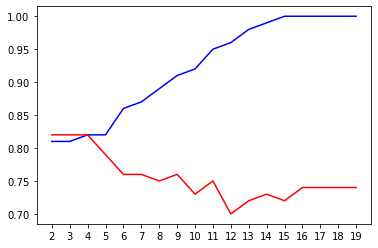

In [28]:
import matplotlib.pyplot as plt
r = range(2,20,1)
plt.plot(r,tr,c="blue")
plt.plot(r,ts,c="red")
plt.xticks(r)
plt.show()

### Creating optimum model which has max_depth = 4

In [29]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21,criterion="entropy",max_depth=4)
model = dtc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.8228
Testing Accuracy  :  0.8211
Training Recall   :  0.9941
Testing Recall    :  0.9647


In [30]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(ytest,ts_pred))

[[19 19]
 [ 3 82]]


### Cross Validation (Gridsearchcv) for Model 1

In [31]:
tg = {"max_depth":range(2,20,1),"criterion":['gini','entropy']}
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21)
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(dtc,tg,scoring="accuracy",cv=20)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [32]:
model1 = cvmodel.best_estimator_
pred = model1.predict(Xnew)
acc1 = accuracy_score(pred,Y)
rec1 = recall_score(pred,Y)
print('Accuracy : ',round(acc1,4))
print('Recall   : ',round(rec1,4))

Accuracy :  0.816
Recall   :  0.7965


In [33]:
print(confusion_matrix(pred,Y))

[[ 86   7]
 [106 415]]


In [34]:
Q = pd.DataFrame(Xnew.columns,columns=["col"])
Q['imp']=model1.feature_importances_

In [35]:
Q.sort_values(by=["imp"],ascending=False)

,col,imp
17,Credit_History_Yes,0.887584
1,CoapplicantIncome,0.049299
19,Property_Area_Semiurban,0.036449
2,LoanAmount,0.019762
0,ApplicantIncome,0.006906
12,Education_Graduate,0.000000
18,Property_Area_Rural,0.000000
16,Credit_History_No,0.000000
15,Self_Employed_Yes,0.000000
14,Self_Employed_No,0.000000


# Model 2 : Random Forest 

### Test Train Split

In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

### Model Creation

In [37]:
from sklearn.ensemble import RandomForestClassifier
tr = []
ts = []
for i in range(2,40,1):
    rfc = RandomForestClassifier(random_state=21,n_estimators=i)
    model = rfc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

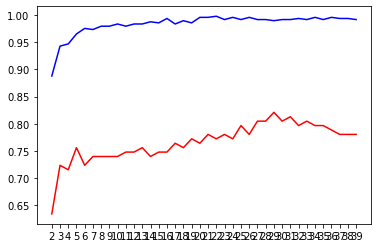

In [38]:
import matplotlib.pyplot as plt
r = range(2,40,1)
plt.plot(r,tr,c="blue")
plt.plot(r,ts,c="red")
plt.xticks(r)
plt.show()

### Creating Model with highest testing accurcy estimators=29 

In [39]:
rfc = RandomForestClassifier(random_state=21,n_estimators=29)
model = rfc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.9898
Testing Accuracy  :  0.8211
Training Recall   :  1.0
Testing Recall    :  0.9059


In [40]:
print(confusion_matrix(ts_pred,ytest))

[[24  8]
 [14 77]]


### Cross Validation for Random Forest

In [41]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
tg = {"n_estimators":range(2,31,1),"max_depth":range(2,20),"criterion":['gini','entropy']}
cv = GridSearchCV(rfc,tg,scoring='accuracy',cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 8}

In [42]:
model2 = cvmodel.best_estimator_
pred = model2.predict(Xnew)
acc2 = accuracy_score(pred,Y)
rec2 = recall_score(pred,Y)
print('Accuracy : ',round(acc2,4))
print('Recall   : ',round(rec2,4))

Accuracy :  0.8208
Recall   :  0.8


In [43]:
print(confusion_matrix(pred,Y))

[[ 88   6]
 [104 416]]


In [44]:
Q = pd.DataFrame(Xnew.columns,columns=["col"])
Q['imp']=model2.feature_importances_

In [45]:
Q.sort_values(by=["imp"],ascending=False)

,col,imp
16,Credit_History_No,0.353017
17,Credit_History_Yes,0.258027
2,LoanAmount,0.087557
0,ApplicantIncome,0.071386
3,Loan_Amount_Term,0.041107
9,Dependents_1,0.028049
1,CoapplicantIncome,0.026510
6,Married_No,0.016991
19,Property_Area_Semiurban,0.015363
13,Education_Not Graduate,0.014270


### Cross Validation for Random Forest Min_Sample_Leaf Model a2

In [46]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
tg = {"n_estimators":range(2,31,1),"min_samples_leaf":range(2,20,1),"criterion":['gini','entropy']}
cv = GridSearchCV(rfc,tg,scoring='accuracy',cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 9, 'n_estimators': 4}

In [47]:
model_a2 = cvmodel.best_estimator_
pred = model_a2.predict(Xnew)
acc_a2 = accuracy_score(pred,Y)
rec_a2 = recall_score(pred,Y)
print('Accuracy : ',round(acc_a2,4))
print('Recall   : ',round(rec_a2,4))

Accuracy :  0.8208
Recall   :  0.8023


### Cross Validation for Random Forest Min_Sample_Split Model b2

In [48]:
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=21)
tg = {"n_estimators":range(2,31,1),"min_samples_split":range(2,20,1),"criterion":['gini','entropy']}
cv = GridSearchCV(rfc,tg,scoring='accuracy',cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'gini', 'min_samples_split': 16, 'n_estimators': 7}

In [49]:
model_b2= cvmodel.best_estimator_
pred = model_b2.predict(Xnew)
acc_b2 = accuracy_score(pred,Y)
rec_b2 = recall_score(pred,Y)
print('Accuracy : ',round(acc_b2,4))
print('Recall   : ',round(rec_b2,4))

Accuracy :  0.855
Recall   :  0.8433


In [50]:
Q = pd.DataFrame(Xnew.columns,columns=["col"])
Q['imp']=model_b2.feature_importances_

In [51]:
Q.sort_values(by=["imp"],ascending=False)

,col,imp
16,Credit_History_No,0.327826
17,Credit_History_Yes,0.158441
0,ApplicantIncome,0.132284
2,LoanAmount,0.107462
1,CoapplicantIncome,0.056706
3,Loan_Amount_Term,0.040993
19,Property_Area_Semiurban,0.025011
8,Dependents_0,0.019732
7,Married_Yes,0.019198
12,Education_Graduate,0.018202


# Model 3 Adaboost

### Test Train Split 

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

### Model Creation

In [53]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)
tr = []
ts = []
for i in range(2,40):
    abc = AdaBoostClassifier(dtc,n_estimators=i)
    model = abc.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

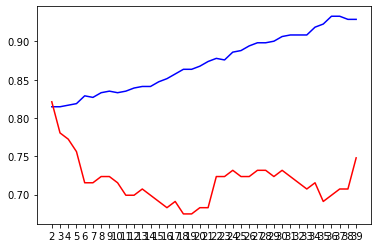

In [54]:
import matplotlib.pyplot as plt
r = range(2,40,1)
plt.plot(r,tr,c="blue")
plt.plot(r,ts,c="red")
plt.xticks(r)
plt.show()

### creating best model with estimators = 2

In [55]:
abc = AdaBoostClassifier(dtc,n_estimators=2)
model = abc.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.8147
Testing Accuracy  :  0.8211
Training Recall   :  0.9881
Testing Recall    :  0.9647


In [56]:
print(confusion_matrix(ts_pred,ytest))

[[19  3]
 [19 82]]


### Cross Validation for Adaboost

In [57]:
from sklearn.model_selection import GridSearchCV
abc = AdaBoostClassifier(dtc)

tg = {'n_estimators':range(2,41,1)}
cv = GridSearchCV(abc,tg,scoring='accuracy',cv=20)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'n_estimators': 2}

In [58]:
model3 = cvmodel.best_estimator_
pred = model3.predict(Xnew)
acc3 = accuracy_score(pred,Y)
rec3 = recall_score(pred,Y)
print('Accuracy : ',round(acc3,4))
print('Recall   : ',round(rec3,4))

Accuracy :  0.816
Recall   :  0.7965


In [59]:
Q = pd.DataFrame(Xnew.columns,columns=["col"])
Q['imp']=model3.feature_importances_

In [60]:
Q.sort_values(by=["imp"],ascending=False)

,col,imp
17,Credit_History_Yes,0.468204
19,Property_Area_Semiurban,0.273382
2,LoanAmount,0.156440
1,CoapplicantIncome,0.101975
0,ApplicantIncome,0.000000
12,Education_Graduate,0.000000
18,Property_Area_Rural,0.000000
16,Credit_History_No,0.000000
15,Self_Employed_Yes,0.000000
14,Self_Employed_No,0.000000


# Model 4 : KNN

### Scaling the data with Standard Scaler

In [61]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X11 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [62]:
X21= pd.get_dummies(X[cat])
Xnew2 = X11.join(X21)

### Test Train Split

In [63]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew2,Y,test_size=0.2,random_state=21)

### Model Creation 

In [64]:
from sklearn.neighbors import KNeighborsClassifier
tr = []
ts = []
for i in range(2,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

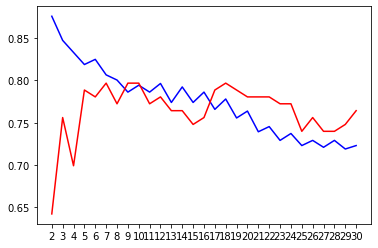

In [65]:
import matplotlib.pyplot as plt
r = range(2,31,1)
plt.plot(r,tr,c="blue")
plt.plot(r,ts,c="red")
plt.xticks(r)
plt.show()

In [66]:
max(ts)

0.7967479674796748

### Creating model with 18 neighbours

In [67]:
knn = KNeighborsClassifier(n_neighbors=18)
model = knn.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.778
Testing Accuracy  :  0.7967
Training Recall   :  0.9941
Testing Recall    :  0.9765


### KNN Crossvalidation

In [68]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

tg = {"n_neighbors":range(2,31,1)}
cv = GridSearchCV(knn,tg,scoring='accuracy',cv=20)
cvmodel = cv.fit(Xnew2,Y)
cvmodel.best_params_

{'n_neighbors': 16}

In [69]:
model4 = cvmodel.best_estimator_
pred = model3.predict(Xnew2)
acc4 = accuracy_score(pred,Y)
rec4 = recall_score(pred,Y)
print('Accuracy : ',round(acc4,4))
print('Recall   : ',round(rec4,4))

Accuracy :  0.8094
Recall   :  0.7905


# Checking Accuracy Score and Recall for each cross validated model 

In [70]:
score = {'Algorithm':['Decision Tree','Random Forest Max Depth','Random Forest Min Sample Leaf','Random Forest Min Sample Split','Adaboost','KNN'],
         'Accuracy':[acc1,acc2,acc_a2,acc_b2,acc3,acc4],
         'Recall':[rec1,rec2,rec_a2,rec_b2,rec3,rec4],
         'Model Number':['1','2','a2','b2','3','4']}
s = pd.DataFrame(score)
s

,Algorithm,Accuracy,Recall,Model Number
0,Decision Tree,0.815961,0.796545,1
1,Random Forest Max Depth,0.820847,0.800000,2
2,Random Forest Min Sample Leaf,0.820847,0.802326,a2
3,Random Forest Min Sample Split,0.855049,0.843299,b2
4,Adaboost,0.815961,0.796545,3
5,KNN,0.809446,0.790476,4


# Above Results Show that Random Forest with Max Split is best than other models

# Using random forest Max Split to predict Testing sheet

In [71]:
testing2 = testing.drop(labels='Loan_ID',axis=1)
cat2, con2 =catcon(testing2) 

Categorical and Continuous variables appended


In [72]:
Xts1 = testing2[con2]
Xts2 = pd.get_dummies(testing2[cat2])
XtsNew = Xts1.join(Xts2)

In [73]:
XtsNew.shape

(367, 21)

In [74]:
Xnew.shape

(614, 21)

In [75]:
TestPredictions = model_b2.predict(XtsNew)

In [76]:
TestPredictions = le.inverse_transform(TestPredictions)

In [77]:
TestPredictionsDF = pd.DataFrame({'Loan_ID':testing['Loan_ID'],'Loan_Status_Predicted':TestPredictions})

In [78]:
TestPredictionsDF

,Loan_ID,Loan_Status_Predicted
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [79]:
TestPredictionsDF.groupby(by='Loan_Status_Predicted').count()

,Loan_ID
Loan_Status_Predicted,
N,70
Y,297


In [80]:
TestPredictionsDF.to_csv('D:/Etlhive class data/Project Loan 280822 Classification and Regression/Output/TestPredictions.csv')

# Problem 2 : Calculate Eligible loan amount for given duration

#### In this problem training data should consist only of accepted Loan Status then we can predict the eligible loan amount

In [81]:
training2 = training[training['Loan_Status']=='Y']
training2.index = range(len(training2))
training2 = training2.drop(labels=['Loan_Status'],axis=1)
training2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,Yes,Urban
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,Yes,Urban
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,Yes,Urban
3,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,Yes,Urban
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,360.0,Yes,Urban


In [82]:
training2.corr()['LoanAmount']

ApplicantIncome      0.613727
CoapplicantIncome    0.122415
LoanAmount           1.000000
Loan_Amount_Term     0.039909
Name: LoanAmount, dtype: float64

In [83]:
from PM3 import ANOVA
cat, con = catcon(training2)
q2 = []
for i in cat:
    q2.append(ANOVA(training,i,'LoanAmount'))

Categorical and Continuous variables appended


In [84]:
c = pd.DataFrame({'Column':cat,'pval':q2}).sort_values(by='pval')
c

,Column,pval
3,Education,0.00003
2,Dependents,0.00010
1,Married,0.00025
4,Self_Employed,0.00424
0,Gender,0.00743
6,Property_Area,0.52551
5,Credit_History,0.97178


In [85]:
imp_cat_col = list(c[c['pval']<0.05].Column)

In [86]:
imp_cat_col

['Education', 'Dependents', 'Married', 'Self_Employed', 'Gender']

### X, Y, Split

In [87]:
X = training2.drop(labels=['LoanAmount'],axis=1)
Y = training2[['LoanAmount']]
cat, con = catcon(X)
X1 = X[con]
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

Categorical and Continuous variables appended


# Model 1a : Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
tr = []
ts = []
for i in range(2,60):
    rfr = RandomForestRegressor(random_state=21,n_estimators=i)
    model = rfr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

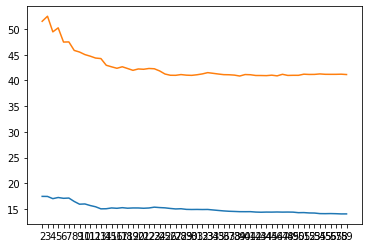

In [89]:
import matplotlib.pyplot as plt
r = range(2,60)
plt.plot(r,tr)
plt.plot(r,ts)
plt.xticks(r)
plt.show()

### Cross Validation

In [90]:
from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor(random_state=21)

tg = {"n_estimators":range(2,30,1),"max_depth":range(2,20),"criterion":['mae','mse']}
cv = GridSearchCV(rfr,tg,scoring='neg_mean_squared_error',cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'mae', 'max_depth': 5, 'n_estimators': 16}

In [91]:
model1a = cvmodel.best_estimator_
pred = model1a.predict(Xnew)
from sklearn.metrics import mean_squared_error, r2_score
err = mean_squared_error(pred,Y)
r2 = r2_score(pred,Y)
print('Mean Squared Error is      : ',round(err,2))
print('Root Mean Squared Error is : ',round(err**0.5,2))
print('R2 Score is                : ',round(r2,4))

Mean Squared Error is      :  2114.57
Root Mean Squared Error is :  45.98
R2 Score is                :  0.4127


# Model 2a : KNN

### Preprocessing

In [92]:
X = training2.drop(labels=['LoanAmount'],axis=1)
Y = training2[['LoanAmount']]
cat, con = catcon(X)

Categorical and Continuous variables appended


In [93]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X11 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [94]:
X21 = pd.get_dummies(X[cat])
Xnew2 = X11.join(X21)

### Train Test Split

In [95]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew2,Y,test_size=0.2,random_state=21)

### Model Creation

In [96]:
from sklearn.neighbors import KNeighborsRegressor
tr = []
ts = []
for i in range(2,51):
    knn = KNeighborsRegressor(n_neighbors=i)
    model = knn.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

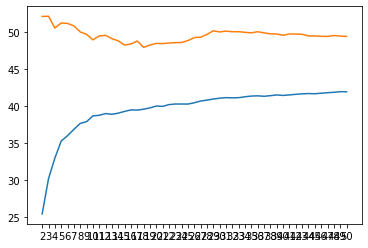

In [97]:
import matplotlib.pyplot as plt
r = range(2,51)
plt.plot(r,tr)
plt.plot(r,ts)
plt.xticks(r)
plt.show()

In [98]:
min(ts)

47.935024730612966

### Cross Validation

In [99]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()

tg = {"n_neighbors":range(2,51,1)}
cv = GridSearchCV(knn,tg,scoring='neg_mean_squared_error',cv=20)
cvmodel = cv.fit(Xnew2,Y)
cvmodel.best_params_

{'n_neighbors': 7}

In [100]:
model2a = cvmodel.best_estimator_
pred = model2a.predict(Xnew2)
from sklearn.metrics import mean_squared_error, r2_score
err = mean_squared_error(pred,Y)
r2 = r2_score(pred,Y)
print('Mean Squared Error is      : ',round(err,2))
print('Root Mean Squared Error is : ',round(err**0.5,2))
print('R2 Score is                : ',round(r2,4))

Mean Squared Error is      :  3748.83
Root Mean Squared Error is :  61.23
R2 Score is                :  -0.7309


# Both above models fail to get a good R2 Score hence check for MLR model

# Model 3a : MLR 

In [101]:
training2.corr()['LoanAmount']

ApplicantIncome      0.613727
CoapplicantIncome    0.122415
LoanAmount           1.000000
Loan_Amount_Term     0.039909
Name: LoanAmount, dtype: float64

In [102]:
imp_con_col = ['ApplicantIncome','CoapplicantIncome']

In [103]:
c

,Column,pval
3,Education,0.00003
2,Dependents,0.00010
1,Married,0.00025
4,Self_Employed,0.00424
0,Gender,0.00743
6,Property_Area,0.52551
5,Credit_History,0.97178


In [104]:
imp_cat_col

['Education', 'Dependents', 'Married', 'Self_Employed', 'Gender']

### Checking for Outliers

In [105]:
cat, con = catcon(training2)

Categorical and Continuous variables appended


In [106]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xt = pd.DataFrame(ss.fit_transform(training2[con]),columns=con)

In [107]:
outliers = []
for i in con:
    outliers.extend(list(Xt[(Xt[i]>3)|(Xt[i]<-3)].index))
    
from numpy import unique
outliers = unique(outliers)

In [108]:
training2 = training2.drop(index=outliers,axis=0)
training2.index = range(0,training2.shape[0])

### Defining X, Y

In [109]:
X = training2.drop(labels=['LoanAmount'],axis=1)
Y = training2[['LoanAmount']]

### Preprocessing

In [110]:
X1 = pd.DataFrame(ss.fit_transform(X[imp_con_col]),columns=imp_con_col)
X2 = pd.get_dummies(X[imp_cat_col])
Xnew3 = X1.join(X2)

### Train Test Split

In [111]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew3,Y,test_size=0.2,random_state=31)

### Statsmodel for Backward Elimination

In [112]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
print(round(model.rsquared_adj,4),"\n\n")
col_to_drop = model.pvalues.sort_values().index[-1]
print(col_to_drop)

0.3478 


Dependents_0


In [113]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             LoanAmount   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     19.61
Date:                Wed, 31 Aug 2022   Prob (F-statistic):           7.13e-26
Time:                        22:10:37   Log-Likelihood:                -1624.8
No. Observations:                 315   AIC:                             3270.
Df Residuals:                     305   BIC:                             3307.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     40.1863      1.634     24.590      0.000      36.970      43.402
ApplicantIncome           29.0588      2.911      9.981      0.000      23.330      34.788
CoapplicantIncome         21.8319      2.614      8.351      0.000      16.688      26.976
Education_Graduate        23.8954      2.908      8.217      0.000      18.173      29.618
Education_Not Graduate    16.2909      3.344      4.872      0.000       9.711      22.871
Dependents_0               2.9584      4.073      0.726      0.468      -5.056      10.972
Dependents_1              13.8924      5.564      2.497      0.013       2.943      24.842
Dependents_2               8.3934      5.274      1.592      0.113      -1.984      18.771
Dependents_3+             14.9421      7.786      1.919      0.056      -0.380      30.264
Married_No                19.6965      3.202      6.152      0.000      13.397      25.996
Married_Yes               20.4898      3.002      6.826      0.000      14.583      26.396
Self_Employed_No          20.8061      3.522      5.908      0.000      13.876      27.737
Self_Employed_Yes         19.3802      4.370      4.435      0.000      10.782      27.979
Gender_Female             15.3436      3.932      3.902      0.000       7.607      23.081
Gender_Male               24.8427      3.289      7.552      0.000      18.370      31.315
==============================================================================
Omnibus:                       35.396   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.468
Skew:                          -0.436   Prob(JB):                     1.39e-25
Kurtosis:                       5.822   Cond. No.                     2.29e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.54e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [114]:
rsq = []
dropped_columns = []
Q = range(1,2)
for i in Q:
    Xnew3 = Xnew3.drop(labels=col_to_drop,axis=1)
    xtrain,xtest,ytrain,ytest=train_test_split(Xnew3,Y,test_size=0.2,random_state=31)
    xconst = add_constant(xtrain)
    ols = OLS(ytrain,xconst)
    model = ols.fit()
    rsq.append(round(model.rsquared_adj,4))
    dropped_columns.append(col_to_drop)
    col_to_drop = model.pvalues.sort_values().index[-1]    

In [115]:
max(rsq)

0.3478

### Creating a Linear Model

In [116]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_squared_error
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)

In [117]:
tr_err

1769.2312885467393

In [118]:
ts_err

2288.9044420267755

### Regularisation

In [119]:
lambdas = []
q = 0.00
for i in range(0,1000):
    q = round(q + 0.01,2)
    lambdas.append(q)

In [120]:
tr = []
ts = []
ge = []
counter = 0
for i in lambdas:
    from sklearn.linear_model import Lasso
    ls = Lasso(alpha=i)
    model = ls.fit(xtrain,ytrain)
    pred_tr = model.predict(xtrain)
    pred_ts = model.predict(xtest)
    from sklearn.metrics import mean_squared_error
    tr_err = mean_squared_error(ytrain,pred_tr)
    ts_err = mean_squared_error(ytest,pred_ts)
    tr.append(tr_err)
    ts.append(ts_err)
    ge.append(ts_err-tr_err)
    if (counter>= 1) and (ge[counter-1]>0 and ge[counter]<0):
        print('Optimum value of alpha is:',i)
    counter = counter+1

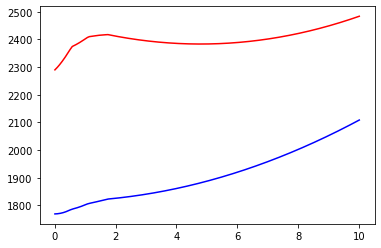

In [121]:
plt.plot(lambdas,tr,c="blue")
plt.plot(lambdas,ts,c="red")

In [122]:
tuning_grid = {"alpha":lambdas}
ls = Lasso()
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(ls,tuning_grid,scoring="neg_mean_squared_error",cv=20)
cvmodel = cv.fit(Xnew3,Y)
cvmodel.best_params_

{'alpha': 0.21}

In [123]:
model3a = cvmodel.best_estimator_
pred = model3a.predict(Xnew3)

In [124]:
from sklearn.metrics import mean_squared_error, r2_score
err = mean_squared_error(pred,Y)
r2 = r2_score(pred,Y)
print('Mean Squared Error is      : ',round(err,2))
print('Root Mean Squared Error is : ',round(err**0.5,2))
print('R2 Score is                : ',round(r2,4))

Mean Squared Error is      :  1866.81
Root Mean Squared Error is :  43.21
R2 Score is                :  -0.9737


# R2 Score of MLR is also negative hence model fails

# Model with best r2 score here is random forest

# No Models are very good at Predicting the Loan Amount in this Dataset

# Preffered Method to calculate Max Loan value should be - FOIR(Fixed Obligations to Income Ratio) banking method 

# FOIR method suggests that Max EMI = 0.5*Monthly Income

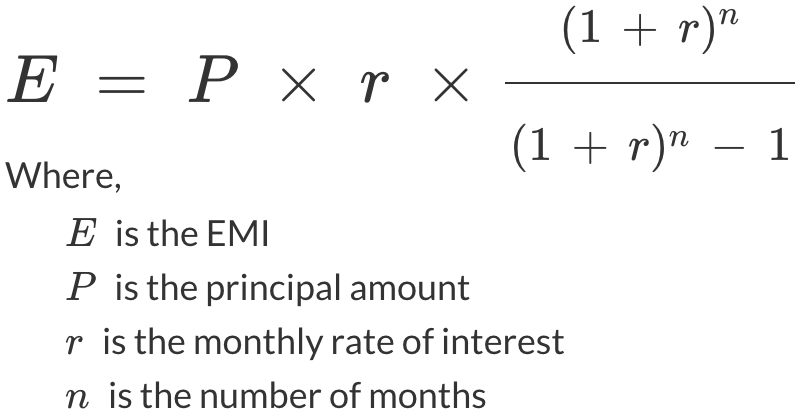

# Rewriting Above Equation to get principal Amount

# P = E*((1+r)^n-1)/((1+r)^n)*r)

#### E = 0.5*Income

# P(Max Loan Amount) = 0.5*Income*((1+r)^n-1)/((1+r)^n)*r)

# Example Calculation Below

In [125]:
Annual_Income = 500000
Monthly_Income = Annual_Income/12
Monthly_Income

41666.666666666664

In [126]:
#Assuming Rate of interest of 15% per Annum and Loan Tenure of 5 years

In [127]:
roi = 0.15
r = roi/12 #Percent per month
n = 5*12 #Period in month

In [128]:
Emax = 0.5*Monthly_Income 

In [129]:
Max_Loan_Amount = Emax*((1+r)**n-1)/(((1+r)**n)*r)

In [130]:
round(Max_Loan_Amount,2)

875720.66

# Using Above method shows Max Loan Amount will be approx 8.75 lakh for person with annual income of 5 lakhs for period of 5 years

# If there is any existing EMI then it should be subtracted from monthly income and then max amount should be calculated

# Example 2 : Person having Annual Income of 10 Lakhs currently pays an EMI of 20000 INR . Calculate max loan amount he can get for 5 year period.

In [131]:
Annual_Income = 1000000
EMI_Current = 20000
Monthly_Income = Annual_Income/12 - EMI_Current
Monthly_Income

63333.33333333333

In [132]:
#Assuming Rate of interest of 15% per Annum

In [133]:
roi = 0.15
r = roi/12 #Percent per month
n = 5*12 #Period in month

In [134]:
Emax = 0.5*Monthly_Income

In [135]:
Max_Loan_Amount = Emax*((1+r)**n-1)/(((1+r)**n)*r)

In [136]:
round(Max_Loan_Amount,2)

1331095.41

# Max Loan Amount for above person will be 13.31 Lakhs for period of 5 years at 15% p.a.

# Using Above Method to calculate Max Loan Amount in our datasets

In [137]:
training.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,Yes,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,Yes,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,Yes,Urban,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,Yes,Urban,Y


In [138]:
training3 = pd.read_csv("D:/Etlhive class data/Project Loan 280822 Classification and Regression/Input/training_set.csv")

In [139]:
crd_hst = []
for i in range(len(training3)):
    if training3['Credit_History'][i]==1:
        crd_hst.append('Yes')
    elif training['Credit_History'][i]==0:
        crd_hst.append('No')
    else:
        crd_hst.append(None)
training3['Credit_History']=crd_hst

In [140]:
replacer(training3)

Missing Values replaced in DataFrame


In [141]:
# Rate of Interest of 15% p.a. assumed actual can vary
r = 0.15/12
k = (1+r)**(training3['Loan_Amount_Term'])
training3['MaxLoanAmount'] = round(0.5*training3['ApplicantIncome']*(k-1)/(k*r),2)

In [142]:
training3.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,MaxLoanAmount
0,LP001002,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,Yes,Urban,Y,231287.42
1,LP001003,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,Yes,Rural,N,213751.69
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,Yes,Urban,Y,118629.21
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,Yes,Urban,Y,102139.75
4,LP001008,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,Yes,Urban,Y,237258.43


In [143]:
training3.to_csv('D:/Etlhive class data/Project Loan 280822 Classification and Regression/Output/MaxLoanAmount.csv')

# Method 2 : MLR with continuous variables only

In [144]:
X = training2.drop(labels=['LoanAmount'],axis=1)
Y = training2[['LoanAmount']]

In [145]:
cat, con = catcon(X)

Categorical and Continuous variables appended


In [146]:
#Considering Only Continuous Variables in new X
Xnew4 = X[con]

In [147]:
Xnew4 = pd.DataFrame(ss.fit_transform(Xnew4),columns=Xnew4.columns)

In [148]:
outliers = []
for i in con:
    outliers.extend(list(Xnew4[(Xnew4[i]>3)|(Xnew4[i]<-3)].index))
    
from numpy import unique
outliers = unique(outliers)

In [149]:
Xnew4 = Xnew4.drop(index=outliers,axis=0)
Xnew4.index = range(0,Xnew4.shape[0])
Y = Y.drop(index=outliers,axis=0)
Y.index = range(0,Y.shape[0])

In [150]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew4,Y,test_size=0.2,random_state=31)

In [151]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)
from sklearn.metrics import mean_squared_error,r2_score
tr_err = mean_squared_error(ytrain,pred_tr)
ts_err = mean_squared_error(ytest,pred_ts)
tr_r2 = r2_score(ytrain,pred_tr) 
ts_r2 = r2_score(ytest,pred_ts)

In [152]:
print(tr_r2)

0.433737268906805


In [153]:
print(ts_r2)

0.5746791419730211


# Above Method also has lower R2 Score

# Problem 3 : Check for eligible loan duration

### Here also we need to filter out approved loans data

In [154]:
training4 = training[training['Loan_Status']=='Y']
training4.index = range(len(training4))
training4 = training4.drop(labels=['Loan_Status'],axis=1)
training4.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,Yes,Urban
1,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,Yes,Urban
2,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,Yes,Urban
3,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,Yes,Urban
4,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.000000,360.0,Yes,Urban


In [155]:
Y = training4[['Loan_Amount_Term']]
X = training4.drop(labels=['Loan_Amount_Term'],axis=1)

In [156]:
cat, con = catcon(X)

Categorical and Continuous variables appended


In [157]:
X1 = X[con]
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

# Model 1b : Random Forest Regressor

In [158]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=21,n_estimators=20)

In [159]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

In [160]:
tr = []
ts = []
for i in range(2,30):
    rfr = RandomForestRegressor(random_state=21,n_estimators=i)
    model = rfr.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

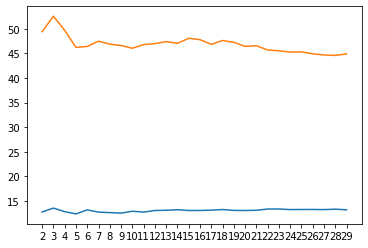

In [161]:
import matplotlib.pyplot as plt
r = range(2,30)
plt.plot(r,tr)
plt.plot(r,ts)
plt.xticks(r)
plt.show()

### Cross Validating

In [162]:
from sklearn.model_selection import GridSearchCV
rfr = RandomForestRegressor(random_state=21)

tg = {"n_estimators":range(2,30,1),"max_depth":range(2,20),"criterion":['mae','mse']}
cv = GridSearchCV(rfr,tg,scoring='neg_mean_absolute_error',cv=4)
cvmodel = cv.fit(Xnew,Y)
cvmodel.best_params_

{'criterion': 'mae', 'max_depth': 3, 'n_estimators': 6}

In [163]:
model1b = cvmodel.best_estimator_
pred = model1b.predict(Xnew)
from sklearn.metrics import mean_squared_error, r2_score
err = mean_squared_error(pred,Y)
r2 = r2_score(pred,Y)
print('Mean Squared Error is      : ',round(err,2))
print('Root Mean Squared Error is : ',round(err**0.5,2))
print('R2 Score is                : ',round(r2,4))

Mean Squared Error is      :  3669.01
Root Mean Squared Error is :  60.57
R2 Score is                :  -7.1454


# Above model shows very bad r2 score

# Checking KNN model

#### Preprocessing

In [164]:
Y = training4[['Loan_Amount_Term']]
X = training4.drop(labels=['Loan_Amount_Term'],axis=1)
cat, con = catcon(X)

Categorical and Continuous variables appended


In [165]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X11 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

In [166]:
X21 = pd.get_dummies(X[cat])
Xnew2 = X11.join(X21)

In [167]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

### Model Creation

In [168]:
from sklearn.neighbors import KNeighborsRegressor
tr = []
ts = []
for i in range(2,31):
    knn = KNeighborsRegressor(n_neighbors=i)
    model = knn.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import mean_absolute_error
    tr_err = mean_absolute_error(ytrain,tr_pred)
    ts_err = mean_absolute_error(ytest,ts_pred)
    tr.append(tr_err)
    ts.append(ts_err)

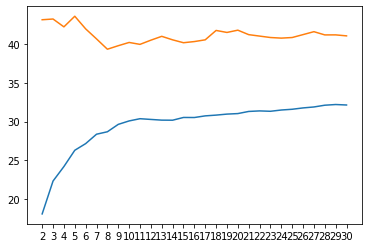

In [169]:
import matplotlib.pyplot as plt
r = range(2,31)
plt.plot(r,tr)
plt.plot(r,ts)
plt.xticks(range(2,31,1))
plt.show()

In [170]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsRegressor()

tg = {"n_neighbors":range(2,31,1)}
cv = GridSearchCV(knn,tg,scoring='neg_mean_absolute_error',cv=20)
cvmodel = cv.fit(Xnew2,Y)
cvmodel.best_params_

{'n_neighbors': 2}

In [171]:
model2b = cvmodel.best_estimator_
pred = model2b.predict(Xnew2)
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
mse = mean_squared_error(pred,Y)
mae = mean_absolute_error(pred,Y)
r2 = r2_score(pred,Y)
print('Mean Squared Error is  : ',round(mse,2))
print('Mean Absolute Error is : ',round(mae,2))
print('R2 Score is            : ',round(r2,4))

Mean Squared Error is  :  1654.25
Mean Absolute Error is :  17.62
R2 Score is            :  0.0938


### KNN Also gives a bad R2 Score

# Checking again with FOIR method for minimum period calculation

# P = E*((1+r)^n-1)/((1+r)^n)*r)

# Pr/E = ((1+r)^n-1)/(1+r)^n

# n = (log(E)-log(E-P*r))/log(1+r)

# E = 0.5*Monthly Income

# Example a person with 5 lakhs per year income wants to take a loan of 10 lakhs at rate of 15% p.a. what is minimum duration for this loan?

In [172]:
import numpy as np
annual_income = 500000
monthly_income = annual_income/12
E = 0.5*monthly_income
loan_amount = 1000000

In [173]:
#Assuming Rate of interest of 15% p.a.
r = 0.15/12
n = (np.log(E)-np.log(E-loan_amount*r))/np.log(1+r)
n

73.76045536498088

##### Above period is in months convert to years by dividing by 12

In [174]:
n = n/12
n 

6.146704613748407

# Hence minimum duration for which person has to take loan is around 6 years at rate of interest of 15% p.a.

# Customer Segmentation using Kmeans clustering 

In [175]:
training.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,Yes,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,Yes,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,Yes,Urban,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,Yes,Urban,Y


### Clustering Customers based on ApplicantIncome and LoanAmount

In [176]:
X = training[['ApplicantIncome','LoanAmount']]

### Scaling data using Standardscaler

In [177]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = ss.fit_transform(X)

### Creating Multiple Kmeans Models for elbow method

In [178]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', random_state = 21)
    km.fit(Xnew)
    wcss.append(km.inertia_)


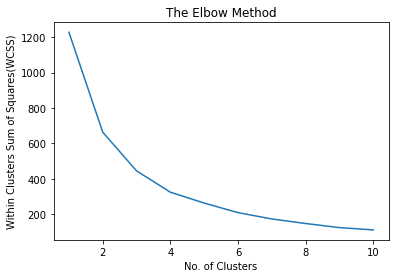

In [179]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Within Clusters Sum of Squares(WCSS)')
plt.show()

# Elbow found at K=4

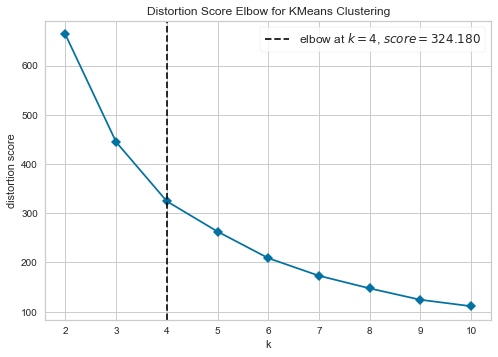

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10, random_state=21), k=(2, 11),
                 timings=False)

In [180]:
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=21),
                  Xnew,
                  k=(2, 11),
                  timings=False)

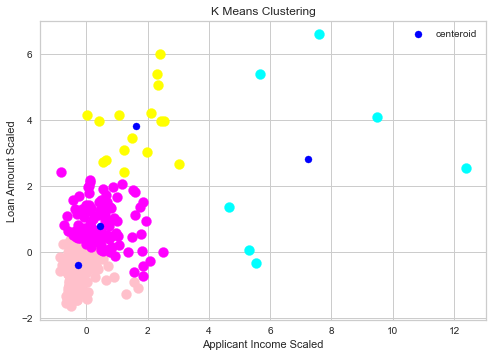

In [181]:
km = KMeans(n_clusters = 4, init = 'k-means++',random_state=21)
y_means = km.fit_predict(Xnew)

plt.scatter(Xnew[y_means == 0, 0], Xnew[y_means == 0, 1], s = 100, c = 'pink')
plt.scatter(Xnew[y_means == 1, 0], Xnew[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(Xnew[y_means == 2, 0], Xnew[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(Xnew[y_means == 3, 0], Xnew[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('K Means Clustering')
plt.xlabel('Applicant Income Scaled')
plt.ylabel('Loan Amount Scaled')
plt.legend()
plt.show()

# Above is scaled data with StandardScaler lets check with actual data plot

In [182]:
X['Cluster']=y_means

In [183]:
X0 = X[X['Cluster']==0]
X1 = X[X['Cluster']==1]
X2 = X[X['Cluster']==2]
X3 = X[X['Cluster']==3]

In [184]:
centroid = X.groupby(by='Cluster').mean()
centroid

,ApplicantIncome,LoanAmount
Cluster,,
0,3684.153193,113.820757
1,15239.687500,466.687500
2,49544.428571,383.142857
3,8022.905512,212.088476


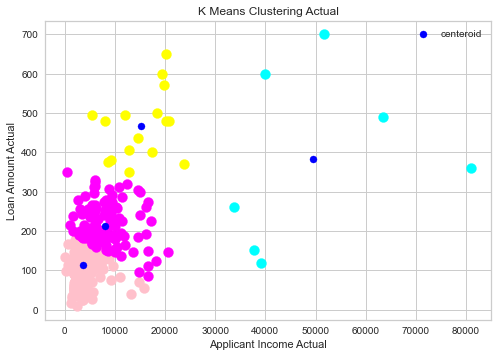

In [185]:
plt.scatter(X0['ApplicantIncome'],X0['LoanAmount'],c = 'pink',s=100)
plt.scatter(X1['ApplicantIncome'],X1['LoanAmount'],c = 'yellow',s=100)
plt.scatter(X2['ApplicantIncome'],X2['LoanAmount'],c = 'cyan',s=100)
plt.scatter(X3['ApplicantIncome'],X3['LoanAmount'],c = 'magenta',s=100)
plt.scatter(centroid['ApplicantIncome'],centroid['LoanAmount'],c='blue',s=50,label = 'centeroid')
plt.title('K Means Clustering Actual')
plt.xlabel('Applicant Income Actual')
plt.ylabel('Loan Amount Actual')
plt.legend()
plt.show()

### Checking with intercluster distance

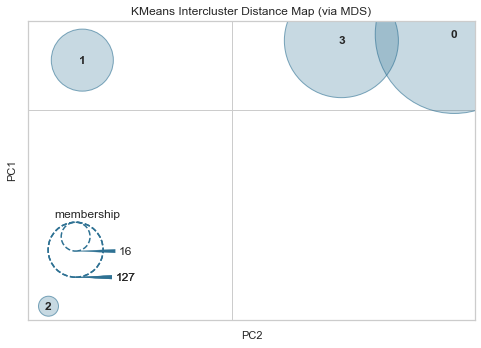

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=4, random_state=21),
                     random_state=21)

In [186]:
from yellowbrick.cluster import intercluster_distance

intercluster_distance(KMeans(random_state=21,n_clusters = 4), 
                      Xnew, 
                      embedding='mds', 
                      random_state=21) 

### Above analysis shows there is seperation between clusters except for clusters 0 and 3 dont have full seperation but is acceptable

# Clustering Based on ApplicantIncome Loan_Amount_Term and LoanAmount

In [189]:
training.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.00000,0.0,146.412162,360.0,Yes,Urban,Y
1,Male,Yes,1,Graduate,No,5405.54085,1508.0,128.000000,360.0,Yes,Rural,N
2,Male,Yes,0,Graduate,Yes,3000.00000,0.0,66.000000,360.0,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583.00000,2358.0,120.000000,360.0,Yes,Urban,Y
4,Male,No,0,Graduate,No,6000.00000,0.0,141.000000,360.0,Yes,Urban,Y


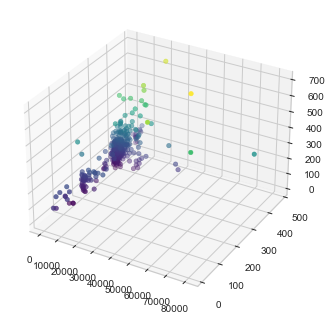

In [193]:
ax = plt.axes(projection='3d')
ax.scatter(training['ApplicantIncome'],training['Loan_Amount_Term'],training['LoanAmount'], c=training['LoanAmount'], cmap='viridis', linewidth=0.5);
plt.show()

In [194]:
X2 = training[['ApplicantIncome','Loan_Amount_Term','LoanAmount']]

In [195]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew2 = ss.fit_transform(X2)

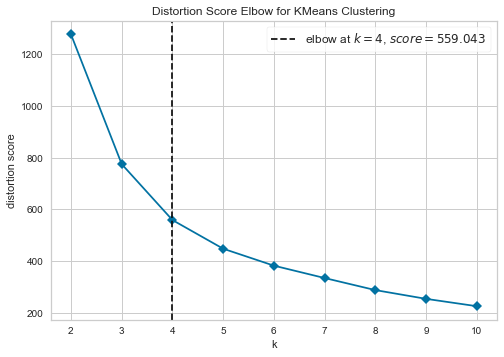

KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10, random_state=21), k=(2, 11),
                 timings=False)

In [197]:
from yellowbrick.cluster.elbow import kelbow_visualizer

kelbow_visualizer(KMeans(random_state=21,init='k-means++'),
                  Xnew2,
                  k=(2, 11),
                  timings=False)

In [200]:
km = KMeans(n_clusters = 4,random_state=21)
y_means = km.fit_predict(Xnew2)
X2['Cluster']=y_means

In [201]:
X20 = X2[X2['Cluster']==0]
X21 = X2[X2['Cluster']==1]
X22 = X2[X2['Cluster']==2]
X23 = X2[X2['Cluster']==3]

In [211]:
ct = X2.groupby(by='Cluster').mean()
ct

,ApplicantIncome,Loan_Amount_Term,LoanAmount
Cluster,,,
0,4181.471595,361.689796,125.076365
1,11046.220339,360.000000,318.735799
2,4681.775862,162.413793,122.797181
3,49544.428571,300.000000,383.142857


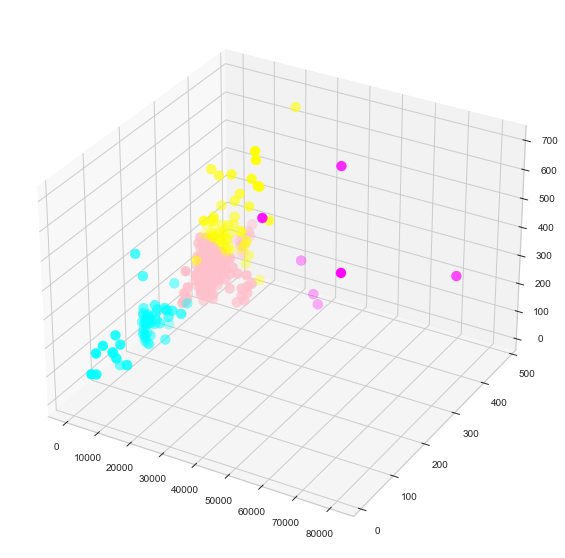

In [219]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X20['ApplicantIncome'],X20['Loan_Amount_Term'],X20['LoanAmount'],c='pink',s=100)
ax.scatter(X21['ApplicantIncome'],X21['Loan_Amount_Term'],X21['LoanAmount'],c='yellow',s=100)
ax.scatter(X22['ApplicantIncome'],X22['Loan_Amount_Term'],X22['LoanAmount'],c='cyan',s=100)
ax.scatter(X23['ApplicantIncome'],X23['Loan_Amount_Term'],X23['LoanAmount'],c='magenta',s=100)
plt.show()

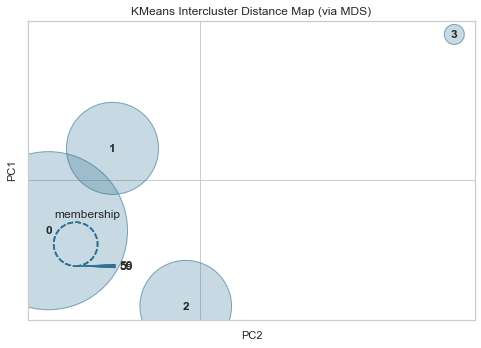

InterclusterDistance(ax=<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=KMeans(n_clusters=4, random_state=21),
                     random_state=21)

In [220]:
from yellowbrick.cluster import intercluster_distance

intercluster_distance(KMeans(random_state=21,n_clusters = 4), 
                      Xnew2, 
                      embedding='mds', 
                      random_state=21) 

# Seperation Observed slight intersection in 0 and 1 which is ok